In [1]:
# import pysam
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
from statsmodels.stats.multitest import multipletests
import matplotlib.ticker as ticker

In [2]:
def getmaxindices(allp,num):
    max_values_and_indices = sorted(enumerate(allp), key=lambda x: x[1], reverse=True)[:num]
    max_indices = [index for index, value in max_values_and_indices]
    return max_indices

In [3]:

# regions={'posmhc':[29720403, 29913914],
# 'posmhc':[30994370, 31528792],
#     'split_chr14_xaa': [19806333, 19976578],
#  'split_chr7_xbc': [124810550, 125070920],
#  'split_chr1_xak': [45762038, 46100296],
#  'split_chr1_xbk': [188243362, 188513984]}

In [4]:
#mhc1
less_95_xs=[]
less_95_ys=[]
from_95_to_99_xs=[]
from_95_to_99_ys=[]
from_99_to_999_xs=[]
from_99_to_999_ys=[]
larger_than_999_xs=[]
larger_than_999_ys=[]
#mhc2
less_95_xs_mhc2=[]
less_95_ys_mhc2=[]
from_95_to_99_xs_mhc2=[]
from_95_to_99_ys_mhc2=[]
from_99_to_999_xs_mhc2=[]
from_99_to_999_ys_mhc2=[]
larger_than_999_xs_mhc2=[]
larger_than_999_ys_mhc2=[]
#mhc3
less_95_xs_mhc3=[]
less_95_ys_mhc3=[]
from_95_to_99_xs_mhc3=[]
from_95_to_99_ys_mhc3=[]
from_99_to_999_xs_mhc3=[]
from_99_to_999_ys_mhc3=[]
larger_than_999_xs_mhc3=[]
larger_than_999_ys_mhc3=[]

In [5]:
#posmhc1
#[29720403, 29913914]
# mean 1.335734293717487
# dev 0.981892670466043
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/csvfiles/mhc.csv")
positions1=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=29720403)&(df_mhc_pos_path["Unnamed: 0"]<=29913914)]["Unnamed: 0"].to_list()
Ps1=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=29720403)&(df_mhc_pos_path["Unnamed: 0"]<=29913914)]["P"].to_list()
midpvalue=[]
mean_arr=0.03411387460093794
std_arr=0.01334116014092687
for prob in Ps1:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs.append(positions1[i])
        less_95_ys.append(Ps1[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99: 
        from_95_to_99_xs.append(positions1[i])
        from_95_to_99_ys.append(Ps1[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999: 
        #arr_99_to_999.append(i)
        from_99_to_999_xs.append(positions1[i])
        from_99_to_999_ys.append(Ps1[i])
    elif pvalue[i]>0.999:  #<0.0001
        #arr_larger_than_999.append(i)
        larger_than_999_xs.append(positions1[i])
        larger_than_999_ys.append(Ps1[i])
    else:
        print("not in this range")

In [6]:
#posmhc2
#[30994370, 31528792]
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/csvfiles/mhc.csv")
positions2=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=30994370)&(df_mhc_pos_path["Unnamed: 0"]<=31528792)]["Unnamed: 0"].to_list()
Ps2=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=30994370)&(df_mhc_pos_path["Unnamed: 0"]<=31528792)]["P"].to_list()
midpvalue=[]
mean_arr=0.03411387460093794
std_arr=0.01334116014092687
for prob in Ps2:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_mhc2.append(positions2[i])
        less_95_ys_mhc2.append(Ps2[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_mhc2.append(positions2[i])
        from_95_to_99_ys_mhc2.append(Ps2[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_mhc2.append(positions2[i])
        from_99_to_999_ys_mhc2.append(Ps2[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_mhc2.append(positions2[i])
        larger_than_999_ys_mhc2.append(Ps2[i])
    else:
        print("not in this range")

In [7]:
#posmhc
#posmhc3
#[32212726, 32882258]
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/csvfiles/mhc.csv")
positions3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=32212726)&(df_mhc_pos_path["Unnamed: 0"]<=32882258)]["Unnamed: 0"].to_list()
Ps3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=32212726)&(df_mhc_pos_path["Unnamed: 0"]<=32882258)]["P"].to_list()
midpvalue=[]
mean_arr=0.03411387460093794
std_arr=0.01334116014092687
for prob in Ps3:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_mhc3.append(positions3[i])
        less_95_ys_mhc3.append(Ps3[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_mhc3.append(positions3[i])
        from_95_to_99_ys_mhc3.append(Ps3[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_mhc3.append(positions3[i])
        from_99_to_999_ys_mhc3.append(Ps3[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_mhc3.append(positions3[i])
        larger_than_999_ys_mhc3.append(Ps3[i])
    else:
        print("not in this range")


In [8]:

zipped_color_list={'ACB': [0.6199018140222545, 0.8273394036727978, 0.07681613835781242],
 'ASW': [0.5231784384407372, 0.5355615576319177, 0.6085573417584578],
 'All': [0.7478976414894968, 0.8581108654424285, 0.8152857852705114],
 'BEB': [0.7702098515876681, 0.34699071947424787, 0.387557687328841],
 'CDX': [0.9944848698557753, 0.4319680883089101, 0.6095703728222707],
 'CEU': [0.22146321845482853, 0.31820344771967357, 0.7921193188659656],
 'CHB': [0.09339120026575065, 0.49739737967690656, 0.9879237745701328],
 'CHS': [0.8750564664998141, 0.7338069529165195, 0.3058546593690403],
 'CLM': [0.737704221385458, 0.9209172916347589, 0.6000025255900048],
 'ESN': [0.03209678227783541, 0.8030222283085109, 0.30596638618321637],
 'FIN': [0.8623378159467614, 0.2079200577555228, 0.008672028349016814],
 'GBR': [0.4251541312392182, 0.3490460463116365, 0.8786460080999065],
 'GIH': [0.7525268826984933, 0.5333121198983907, 0.538554551310322],
 'GWD': [0.2627011188835271, 0.92851968237643, 0.4864089750510442],
 'IBS': [0.25115312032131665, 0.5397035754901451, 0.13380587437193459],
 'ITU': [0.9450480442890117, 0.5394575598574127, 0.8623826849068229],
 'JPT': [0.21405238204705113, 0.540757391337697, 0.08806809839137131],
 'KHV': [0.22561371426433752, 0.9164305579097723, 0.7907538310971419],
 'LWK': [0.20274923299053582, 0.4890267202072731, 0.8462139375324359],
 'MSL': [0.9951137970829559, 0.7005950908445686, 0.4989189517572168],
 'MXL': [0.3259201021356801, 0.8130093336742588, 0.9240844242162518],
 'PEL': [0.9871886206772149, 0.5709065709740972, 0.6773178323861238],
 'PJL': [0.6308240514007377, 0.7852668712542968, 0.7819736701998831],
 'PUR': [0.26909568610792434, 0.31557713998302317, 0.4779229844775781],
 'STU': [0.758551169090893, 0.8611540303381624, 0.3997187576590727],
 'TSI': [0.7384421240805822, 0.37820822943132903, 0.9005885384692488],
 'YRI': [0.42363231438946425, 0.7813235433022089, 0.8635294700674911]}


less_95 = zipped_color_list['YRI']
from_95_to_99 = zipped_color_list['TSI']
from_99_to_999 = zipped_color_list['CDX']
larger_than_999 = zipped_color_list['MSL']

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


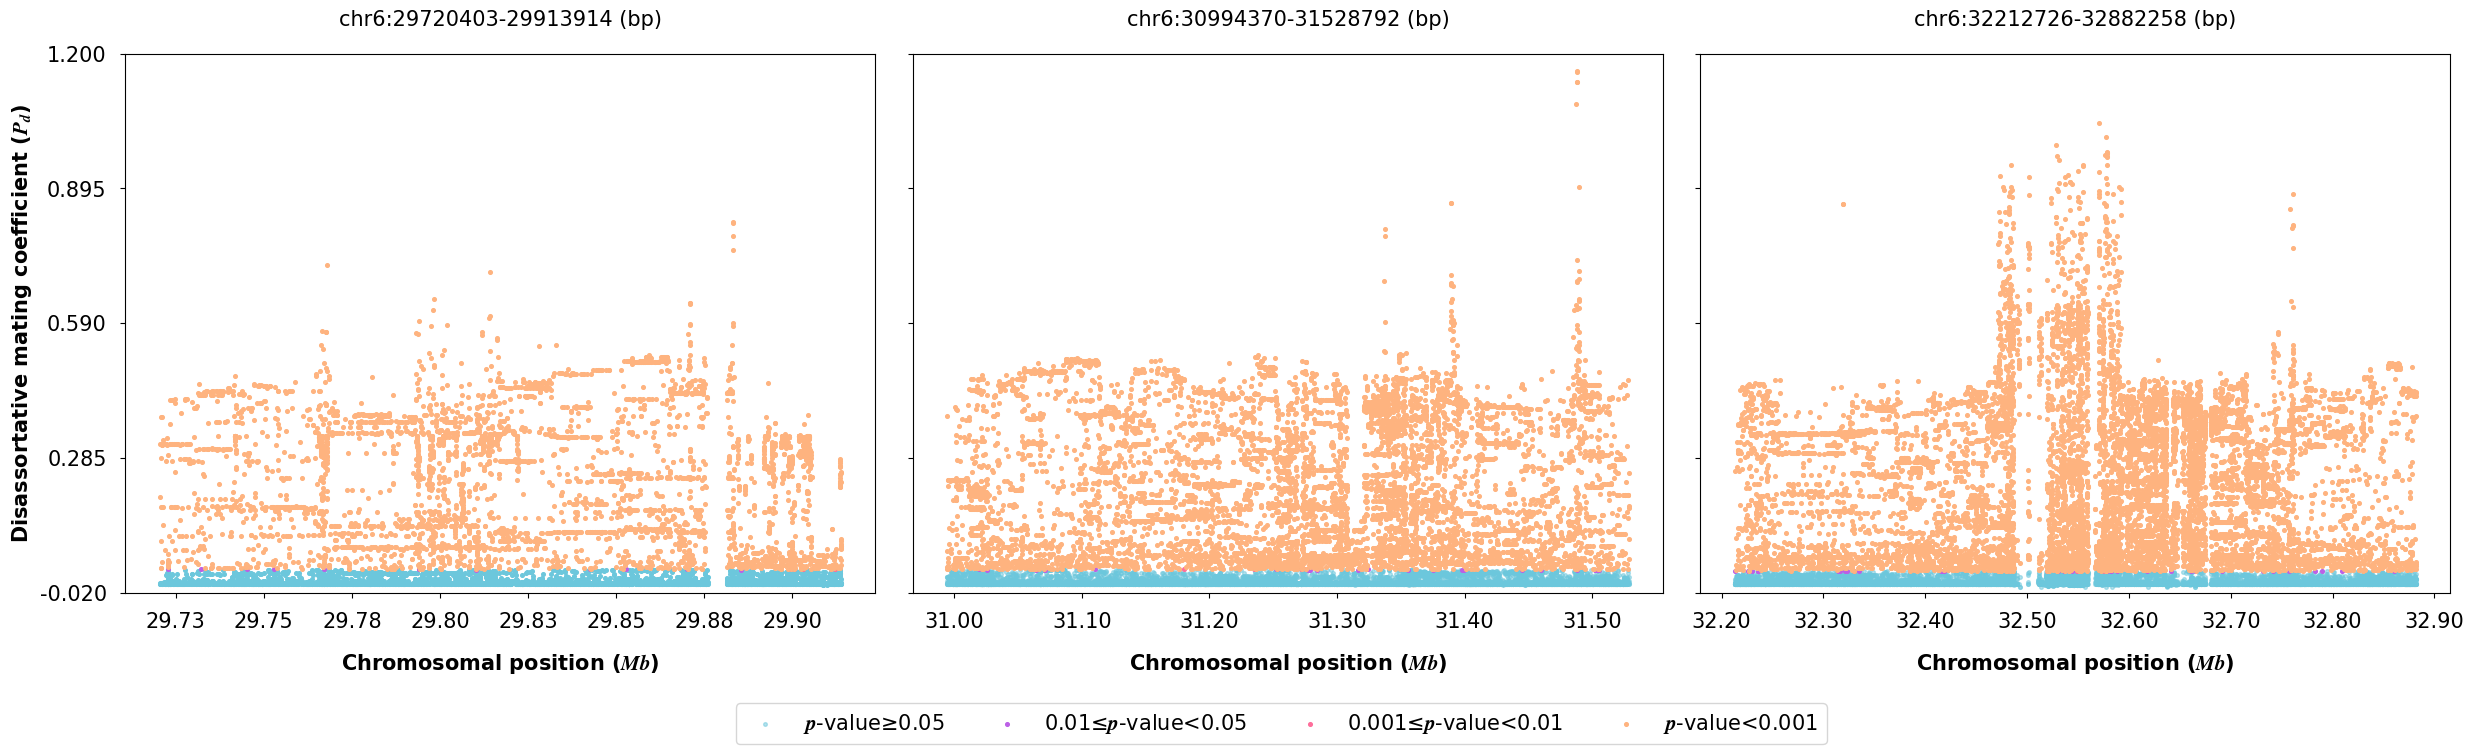

In [14]:
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linewidth'] = 1.2
#plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'STIXGeneral:italic:bold'
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(30, 7), facecolor='white')

# first subplot
axes[0].scatter(np.array(less_95_xs)/ 1000000, less_95_ys, color=less_95, s=7, label="$\mathit{p}$-value≥0.05, alpha=0.5")
axes[0].scatter(np.array(from_95_to_99_xs)/ 1000000, from_95_to_99_ys, color=from_95_to_99, s=7, label="0.01≤$\mathit{p}$-value<0.05")
axes[0].scatter(np.array(from_99_to_999_xs)/ 1000000, from_99_to_999_ys, color=from_99_to_999, s=7, label="0.001≤$\mathit{p}$-value<0.01")
axes[0].scatter(np.array(larger_than_999_xs)/ 1000000, larger_than_999_ys, color=larger_than_999, s=7, label="$\mathit{p}$-value<0.001")
# axes[0].legend(loc="best")
axes[0].set_title(f'chr6:29720403-29913914 (bp)',fontsize=15,pad=20)#chr1_xak

# max y
# index2 = getmaxindices(Ps1, 1)[0]
# x_max_pos =(positions1[index2]  - 9000)/ 1000000
# y_max = Ps1[index2]
# y_max = float(format(y_max, '.5f'))
# axes[0].text(x_max_pos-0.045, y_max+0.05, f'(rs113222119, {r"$P_d$"}={y_max})', color=larger_than_999, fontsize=15, style='italic')

# second subplot
axes[1].scatter(np.array(less_95_xs_mhc2)/ 1000000, less_95_ys_mhc2, color=less_95, s=7,label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[1].scatter(np.array(from_95_to_99_xs_mhc2)/ 1000000, from_95_to_99_ys_mhc2, color=from_95_to_99, s=7,label="0.01≤$\mathit{p}$-value<0.05")
axes[1].scatter(np.array(from_99_to_999_xs_mhc2)/ 1000000, from_99_to_999_ys_mhc2, color=from_99_to_999, s=7,label="0.001≤$\mathit{p}$-value<0.01")
axes[1].scatter(np.array(larger_than_999_xs_mhc2)/ 1000000, larger_than_999_ys_mhc2, color=larger_than_999, s=7,label="$\mathit{p}$-value<0.001")
#axes[1].legend(loc="lower left", bbox_to_anchor=(-0.8, -0.3),ncol=4)
axes[1].set_title(f'chr6:30994370-31528792 (bp)',fontsize=15,pad=20)
# max y
# index2 = getmaxindices(Ps2, 1)[0]
# x_max_pos = positions2[index2]/ 1000000
# y_max = Ps2[index2]
# y_max = float(format(y_max, '.5f'))
# axes[1].text(x_max_pos, y_max+0.05, f'(rs9270526, {r"$P_d$"}={y_max})', color=larger_than_999, fontsize=15, style='italic')
axes[2].scatter(np.array(less_95_xs_mhc3)/ 1000000, less_95_ys_mhc3, color=less_95, s=7,label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[2].scatter(np.array(from_95_to_99_xs_mhc3)/ 1000000, from_95_to_99_ys_mhc3, color=from_95_to_99, s=7,label="0.01≤$\mathit{p}$-value<0.05")
axes[2].scatter(np.array(from_99_to_999_xs_mhc3)/ 1000000, from_99_to_999_ys_mhc3, color=from_99_to_999, s=7,label="0.001≤$\mathit{p}$-value<0.01")
axes[2].scatter(np.array(larger_than_999_xs_mhc3)/ 1000000, larger_than_999_ys_mhc3, color=larger_than_999, s=7,label="$\mathit{p}$-value<0.001")
axes[2].legend(loc="lower left", bbox_to_anchor=(-1.3, -0.3),ncol=4)
axes[2].set_title(f'chr6:32212726-32882258 (bp)',fontsize=15,pad=20)

max_y = 1.2
axes[0].set_ylim(-0.02, max_y)
yticks = np.linspace(-0.02, max_y, num=5)
axes[0].set_yticks(yticks)

formatter = ticker.FormatStrFormatter('%.2f')

for ax in axes.flatten():
    ax.xaxis.set_major_formatter(formatter)
    
formatter_0 = ticker.FormatStrFormatter('%.3f')
axes[0].yaxis.set_major_formatter(formatter_0)

# 
# formatter_1 = ticker.FormatStrFormatter('%.3f')
# axes[1, 0].yaxis.set_major_formatter(formatter_1)
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=15, pad=10)


axes[0].set_xlabel("Chromosomal position (${Mb}$)",fontsize=15, weight = 'bold',labelpad=15)
axes[0].set_ylabel(r"Disassortative mating coefficient ($P_d$)",fontsize=15, weight = 'bold')
# axes[0].set_ylabel(r"\textbf{Disassortative mating coefficient} ($\mathit{Pd}$)", fontsize=15)

axes[1].set_xlabel("Chromosomal position (${Mb}$)",fontsize=15, weight = 'bold',labelpad=15)
axes[2].set_xlabel("Chromosomal position (${Mb}$)",fontsize=15, weight = 'bold',labelpad=15)
# fig.suptitle('Disassortative mating MHC region', fontsize=30, y=1)


plt.subplots_adjust(wspace=0.05, hspace=0.35)

plt.savefig('pic1_mhc.png', dpi=600, bbox_inches='tight')
plt.show()